<a id="top"></a>
# PyCCD
<hr>

# Notebook Summary

PyCCD is an abbreviation of "Python Continuous Change Detection". It is a Python implementation of the land change detection algorithm presented in the paper "Continuous Change Detection and Classification of Land Cover Using All Available Landsat Data" by Zhe Zhu and Curtis E. Woodcock.

<hr><hr>

# Outline

* [Import Dependencies and Connect to the Data Cube](#import)
* [Choose Platform and Product](#plat_prod)
* [Get the Maximum Extents of the Cube](#extents)
* [Define the Extents of the Analysis](#define_extents)
* [Load Data from the Data Cube](#retrieve_data)
* [Run PyCCD](#run_pyccd)
* [Plot Change Volume and Detection Dates](#plot_cng_det_dates)
* [Validate Changes](#validate)

<hr><hr>

## <span id="import">Import Dependencies and Connect to the Data Cube [&#9652;](#top)</span>

In [1]:
%matplotlib inline
import datacube
import utils.data_cube_utilities.data_access_api as dc_api
import datetime as dt

# Supress Warning 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
api = dc_api.DataAccessApi(config = '/home/localuser/.datacube.conf')
dc = api.dc

## <span id="plat_prod">Choose Platform and Product [&#9652;](#top)</span>

In [3]:
# List NetCDF products
print("NetCDF Products:")
products_info = dc.list_products()
netCDF_products = products_info[products_info['format'] == 'NetCDF']
netCDF_products

NetCDF Products:


,name,description,creation_time,product_type,lat,lon,platform,instrument,label,time,format,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,,,
91,alos02_palsar02_scansar_colombia,ALOS2 PALSAR JJFAST tile in DN format processe...,None,tile,None,None,ALOS-2,PALSAR-2,None,None,NetCDF,EPSG:4326,"[-0.0002666666667, 0.0002666666667]","[0.5333333334, 0.5333333334]","(latitude, longitude)"
92,alos02_palsar02_scansar_samoa,ALOS2 PALSAR JJFAST tile in DN format processe...,None,tile,None,None,ALOS-2,PALSAR-2,None,None,NetCDF,EPSG:4326,"[-0.000226039783001808, 0.000231481481481481]","[1, 1]","(latitude, longitude)"
93,alos02_palsar02_scansar_vietnam,ALOS2 PALSAR JJFAST tile in DN format processe...,None,tile,None,None,ALOS-2,PALSAR-2,None,None,NetCDF,EPSG:4326,"[-0.00022583559168925, 0.000241312741312741]","[1, 1]","(latitude, longitude)"
61,alos2_jjfast_scansar_tile_colombia,ALOS2 PALSAR JJFAST tile in DN format processe...,None,tile,None,None,ALOS_2,PALSAR,None,None,NetCDF,EPSG:4326,"[-0.0002666666667, 0.0002666666667]","[0.5333333334, 0.5333333334]","(latitude, longitude)"
65,alos2_palsar2_scansar_caqueta,ALOS2 PALSAR JJFAST tile in DN format processe...,None,tile,None,None,ALOS_2,PALSAR_2,None,None,NetCDF,EPSG:4326,"[-0.0002666666667, 0.0002666666667]","[0.5333333334, 0.5333333334]","(latitude, longitude)"
50,alos2_palsar_colombia,ALOS2 PALSAR tile in DN format processed for t...,None,gamma0,None,None,ALOS_2,PALSAR,None,None,NetCDF,EPSG:4326,"[-0.0002666666667, 0.0002666666667]","[0.5333333334, 0.5333333334]","(latitude, longitude)"
51,alos2_palsar_kenya,ALOS2 PALSAR tile in DN format processed for t...,None,gamma0,None,None,ALOS_2,PALSAR,None,None,NetCDF,EPSG:4326,"[-0.0002666666667, 0.0002666666667]","[0.5333333334, 0.5333333334]","(latitude, longitude)"
52,alos2_palsar_vietnam,ALOS2 PALSAR tile in DN format processed for t...,None,gamma0,None,None,ALOS_2,PALSAR,None,None,NetCDF,EPSG:4326,"[-0.0002666666667, 0.0002666666667]","[0.5333333334, 0.5333333334]","(latitude, longitude)"
53,alos_palsar_colombia,ALOS PALSAR tile in DN format processed for th...,None,gamma0,None,None,ALOS,PALSAR,None,None,NetCDF,EPSG:4326,"[-0.0002666666667, 0.0002666666667]","[0.5333333334, 0.5333333334]","(latitude, longitude)"


In [11]:
platform = "LANDSAT_7"
product = "ls7_ledaps_colombia"

## <span id="extents">Get the Maximum Extents of the Cube [&#9652;](#top)</span>

In [12]:
from utils.data_cube_utilities.dc_load import get_product_extents

full_lat, full_lon, min_max_dates = get_product_extents(api, platform, product)

print("Lat bounds:", full_lat)
print("Lon bounds:", full_lon)
print("Time bounds:", min_max_dates) 

Lat bounds: (-0.9463188159999998, 2.402423485)
Lon bounds: (-76.51785960000001, -74.04569023500001)
Time bounds: (datetime.datetime(2000, 1, 3, 15, 6, 45), datetime.datetime(2015, 12, 14, 15, 15, 6))


In [13]:
from utils.data_cube_utilities.dc_display_map import display_map

# Display the total shared area available for these datacube products.
display_map(latitude = full_lat,longitude = full_lon)

## <span id="define_extents">Define the Extents of the Analysis [&#9652;](#top)</span>

**Specify start and end dates in the same order as platforms and products**

In [31]:
time_extents = ('2000-01-01', '2015-12-31')

**Specify an area to analyze**

In [32]:
######### Bangladesh ############################
# longitude_extents = (90.031428,  90.040565) 
# latitude_extents  = ( 25.225266, 25.232605)

######### Colombia - Cartegena ##################
# longitude_extents = ( -74.8567, -74.8318 )
# latitude_extents = (1.326481586145379,  1.3424)
latitude_extents =  ( 1.3255, 1.33) 
longitude_extents =  (-74.8567, -74.8422)

######## Ghana ##################
#longitude_extents = (  -2.2622,  -2.2039)
#latitude_extents = (8.2390, 8.2867) 

#latitude_extents = (8.2631, 8.2834)
#longitude_extents = (-2.2486, -2.2229)

# longitude_extents = (-2.4026, -2.3484)
# latitude_extents = ( 8.1386,  8.1872)

# ######### Vietnam ################## 
# longitude_extents = (108.02, 108.15) # Buan Tau Sanh Lake
# latitude_extents  = (12.18 , 12.30) # Buan Tau Sanh Lake

# longitude_extents = (108.02, 108.03)
# latitude_extents  = (12.18 , 12.19) 

**Visualize the selected area**

In [33]:
display_map(latitude = latitude_extents, longitude = longitude_extents)

## <span id="retrieve_data">Load Data from the Data Cube[&#9652;](#top)</span>

In [34]:
from utils.data_cube_utilities.dc_load import load_simple
# landsat_dataset, clean_mask, masks = \
#     load_simple(dc,
#                 load_params=dict(latitude = latitude_extents, 
#                                  longitude = longitude_extents,
#                                  time=time_extents,
#                                  measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2', 'pixel_qa']),
#                 platform = platform, product = product)
# del clean_mask, masks
landsat_dataset = dc.load(latitude = latitude_extents,
                          longitude = longitude_extents,
                          time=time_extents,
                          platform = platform,
                          product = product,
                          measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2', 'pixel_qa']) 

> ### Examining the size of our extent.  
> The compute time of pyCCD scales sharply with extent sizes. Seemingly small areas can take anywhere from 10-15 minutes to process.

In [35]:
landsat_dataset
#view the dimensions and sample content from the cube

<xarray.Dataset>
Dimensions:    (latitude: 18, longitude: 55, time: 152)
Coordinates:
  * time       (time) datetime64[ns] 2000-02-20T15:06:11 ... 2015-11-28T15:14:26
  * latitude   (latitude) float64 1.33 1.33 1.33 1.329 ... 1.326 1.326 1.325
  * longitude  (longitude) float64 -74.86 -74.86 -74.86 ... -74.84 -74.84 -74.84
Data variables:
    red        (time, latitude, longitude) int16 1105 913 701 ... 447 556 775
    green      (time, latitude, longitude) int16 1171 1019 890 ... 713 803 1017
    blue       (time, latitude, longitude) int16 915 815 674 654 ... 482 483 765
    nir        (time, latitude, longitude) int16 3372 3372 3493 ... 4408 4407
    swir1      (time, latitude, longitude) int16 2677 2415 2368 ... 2044 2182
    swir2      (time, latitude, longitude) int16 1428 1154 1053 ... 630 812 1030
    pixel_qa   (time, latitude, longitude) int32 96 96 66 66 66 ... 66 66 66 66
Attributes:
    crs:      EPSG:4326

## <span id="run_pyccd">Run PyCCD[&#9652;](#top)</span>

>### Import Library  
The library exposes three functions: `process_xarray`, `process_pixel`, `plot_pixel`  

In [36]:
import utils.data_cube_utilities.dc_ccd as ccd

> ### Timed Calculation of change volume  


In [37]:
%time ccd_product = ccd.process_xarray(landsat_dataset, distributed = True) #Run process xarray on large dataset

CPU times: user 4.62 s, sys: 106 ms, total: 4.72 s
Wall time: 2min 6s


## <span id="plot_cng_det_dates">Plot Change Volume and Detection Dates[&#9652;](#top)</span>

> ## Plotting change volume  
> Plot change volume to identify regions/areas of change

In [38]:
def figure_ratio(ds, fixed_width = 22):
    width = fixed_width
    height = len(ds.latitude) * (fixed_width / len(ds.longitude))
    return (width, height)

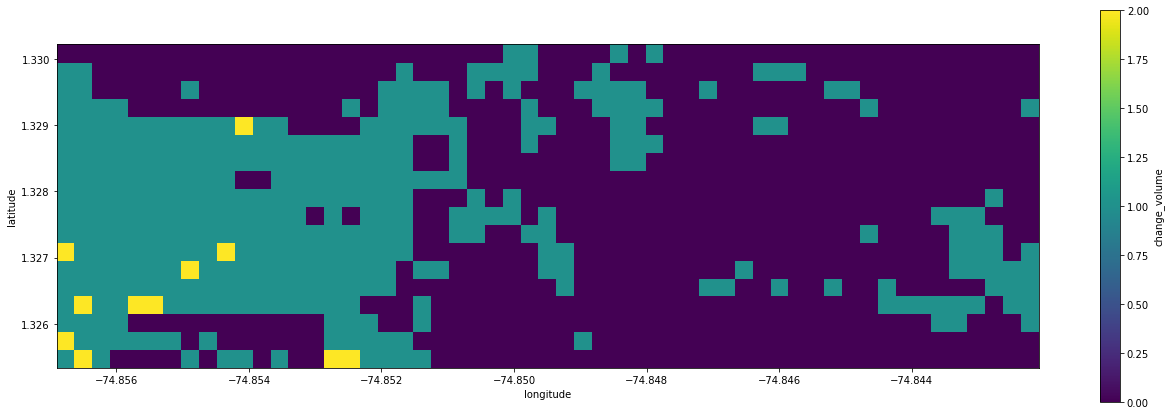

In [39]:
import  matplotlib.pyplot as plt  

plt.figure(figsize = figure_ratio(ccd_product))
ccd_product.plot()
plt.axes().set_aspect("equal")

> ## Time of first changes

In [40]:
%time time_map_ccd_product = ccd.process_xarray(landsat_dataset, distributed = True, process = "first") #Run process xarray on large dataset

CPU times: user 6.82 s, sys: 64.4 ms, total: 6.88 s
Wall time: 1min 59s


> ### Plot Detection Dates

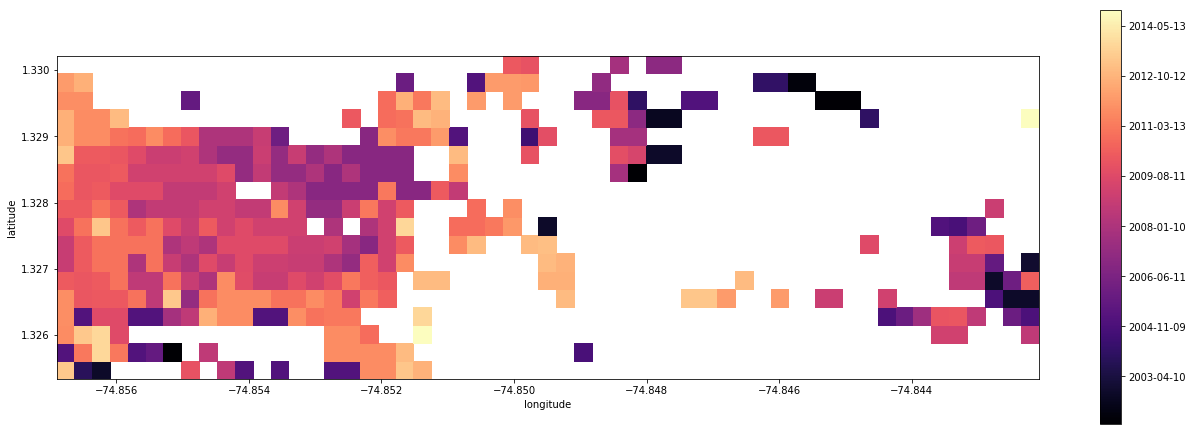

In [41]:
import datetime
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter

plt.figure(figsize = figure_ratio(time_map_ccd_product))
epochFormatter = FuncFormatter(lambda x, pos: datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
time_map_ccd_product.plot(cmap = "magma", cbar_kwargs=({'format': epochFormatter}))
plt.axes().set_aspect("equal")


<br>  

## <span id="validate">Validate Changes[&#9652;](#top)</span>

> ### Imagery from earlier acquisitions  
> Change starts with landcover before...    

2000-04-08T15:05:56.000000000


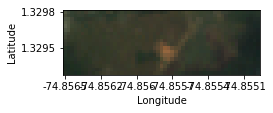

In [42]:
from dc_notebook_utilities import rgb
print( landsat_dataset.time.values[1] )
rgb(landsat_dataset, at_index = 0)

> ### Imagery from later acquisitions  
> ... and is revealed when compared to landcover after.  

2012-12-21T15:09:40.000000000


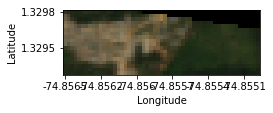

In [43]:
print( landsat_dataset.time.values[130] )
rgb(landsat_dataset, at_index = 130)


<br>
<br>
<br>

># Change within a selected Pixel

<br>
> ### Define Pixel Lat and Lon

In [44]:
## Bangladesh 
pixel_latitude = 25.228928
pixel_longitude  = 90.035790

## Colombia  
pixel_latitude = 1.3282
pixel_longitude  = -74.8549  

> ### Select a Pixel from dataset

In [45]:
target_pixel = landsat_dataset.sel(latitude = pixel_latitude, longitude = pixel_longitude, method = "nearest")

In [46]:
processed_pixel = ccd.process_pixel(target_pixel)

<br>

> ### Plot time series models  

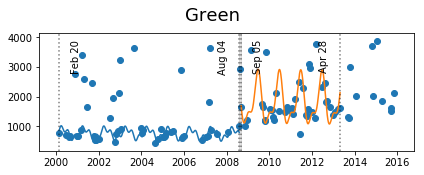

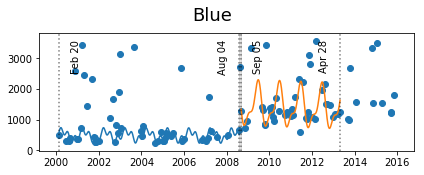

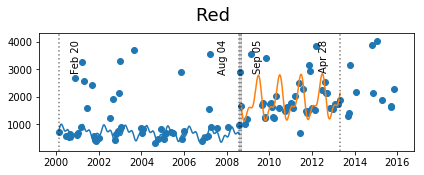

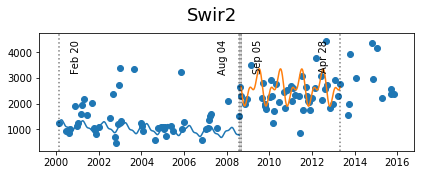

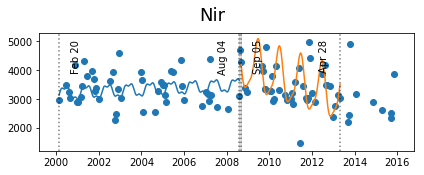

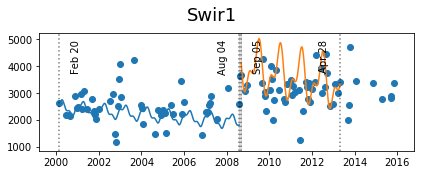

In [47]:
ccd.plot_pixel(processed_pixel)

> ### Plotting Residuals 

In [48]:
from functools import partial
from datetime import datetime, timedelta
from scipy.spatial.distance import euclidean  

def _clean_pixel(_ds, saturation_threshold=10000):
    """Filters out over-saturated values

    Creates a mask from the saturation threshold and > 0 and applies it to _ds.

    Args:
        _ds: dataset to mask
        saturation_threshold: threshold that a pixel must be below to be considered 'clean'

    Returns:
        an xArray dataset that has been masked for saturation and valid (>0) pixels
    """
    ds = _ds
    mask = (ds < saturation_threshold) & (ds >= 0)
    indices = [x for x, y in enumerate(mask.red.values) if y == True]
    return ds.isel(time=indices)


def _n64_to_datetime(n64):
    """Convert Numpy 64 bit timestamps to datetime objects. Units in seconds"""
    return datetime.utcfromtimestamp(n64.tolist() / 1e9)

def n64_to_ordinal(n64):
    dt = _n64_to_datetime(n64)
    return dt.toordinal()

def _plot_res(results=None, original_pixel=None, band=None, file_name=None):
    """Plots CCD residual for a given band. Accepts a 1x1xt xarray if a scatter-plot overlay of original acquisitions over the ccd results is needed."""

    fig = plt.figure(1, figsize =(20,5))
    fig.suptitle(band.title() + " Residual ", fontsize=18, verticalalignment='bottom')

    lastdt = None

    dateLabels = []

    for change_model in results["change_models"]:
        ax1 = fig.add_subplot(111)
        model = getattr(change_model, band)        
        time = original_pixel.sel(time = slice(datetime.fromordinal(change_model.start_day),
                                                datetime.fromordinal(change_model.end_day))
                                  ).time.values        
        ordinal_time = list(map(n64_to_ordinal , time))
        actual    = original_pixel[band].values
        
        predicted = list(map(partial(ccd._lasso_eval,bias= model.intercept, weights = model.coefficients), ordinal_time))
        residual  = list(map(lambda x: euclidean(x[0], x[1]), zip(actual, predicted)))
                
        x = time
        y = residual

        ax1.plot(x, y, label= model.coefficients)
        
        # Curve Fit Code  
        polycoeffs = np.polyfit(ordinal_time,residual,5)

        f = np.poly1d(polycoeffs)

        x_new = np.linspace(ordinal_time[0], ordinal_time[-1], 50)
        y_new = f(x_new)
        ax1.plot(x_new, y_new, c = "#333333")
        
        # Draw Vertical Lines
        dt = datetime.fromordinal(change_model.start_day)
        dateLabels.append(dt)

        if lastdt is not None:
            ax1.axvspan(lastdt, dt, color=(0, 0, 0, 0.1))

        dt = datetime.fromordinal(change_model.end_day)
        dateLabels.append(dt)

        lastdt = dt


    ymin, ymax = ax1.get_ylim()
    for idx, dt in enumerate(dateLabels):
        plt.axvline(x=dt, linestyle='dotted', color=(0, 0, 0, 0.5))
        # Top, inside
        plt.text(
            dt,
            ymax,
            "\n" +  # HACK TO FIX SPACING
            dt.strftime('%b %d') + "  \n"  # HACK TO FIX SPACING
            ,
            rotation=90,
            horizontalalignment='right' if (idx % 2) else 'left',
            verticalalignment='top')

    plt.tight_layout()

    if file_name is not None:
        _save_plot_to_file(plot=plt, file=filename, band_name=band)
    plt.show()


<br>  
> ### Remove points that don't have a `clear` designation on `pixel_qa`

In [49]:
clear_pixel = processed_pixel.where(processed_pixel.pixel_qa == 66, drop = True)

> ### Run Residual Plotting on a pixel with clear values  

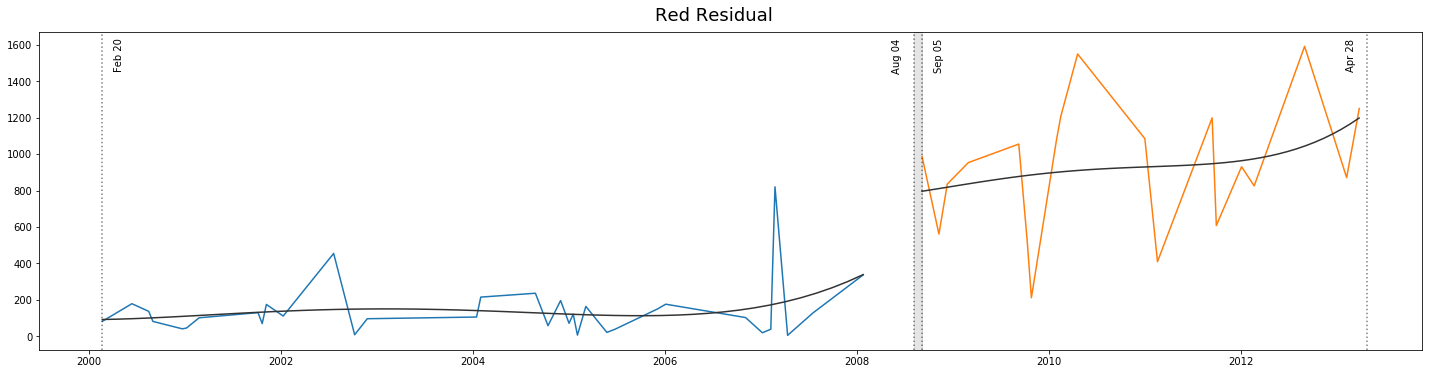

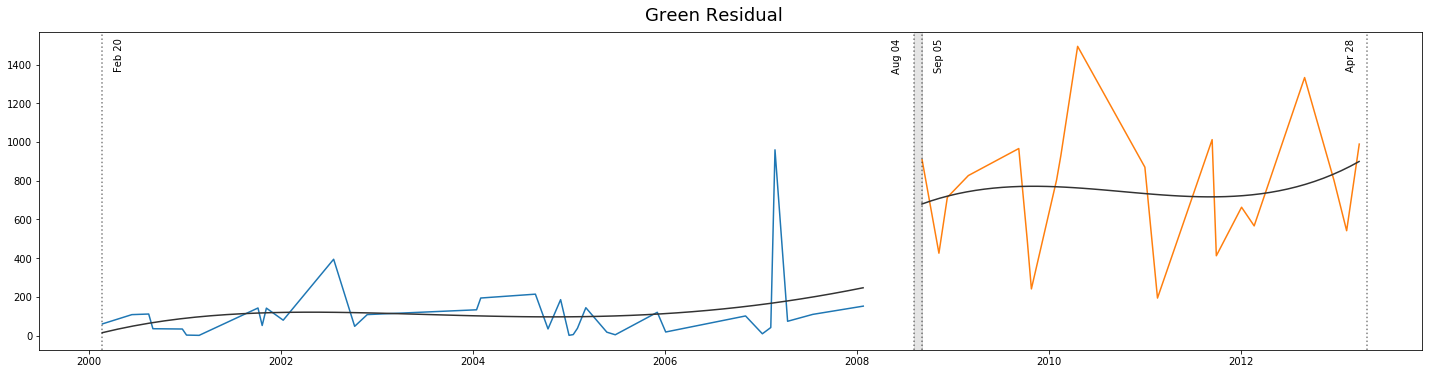

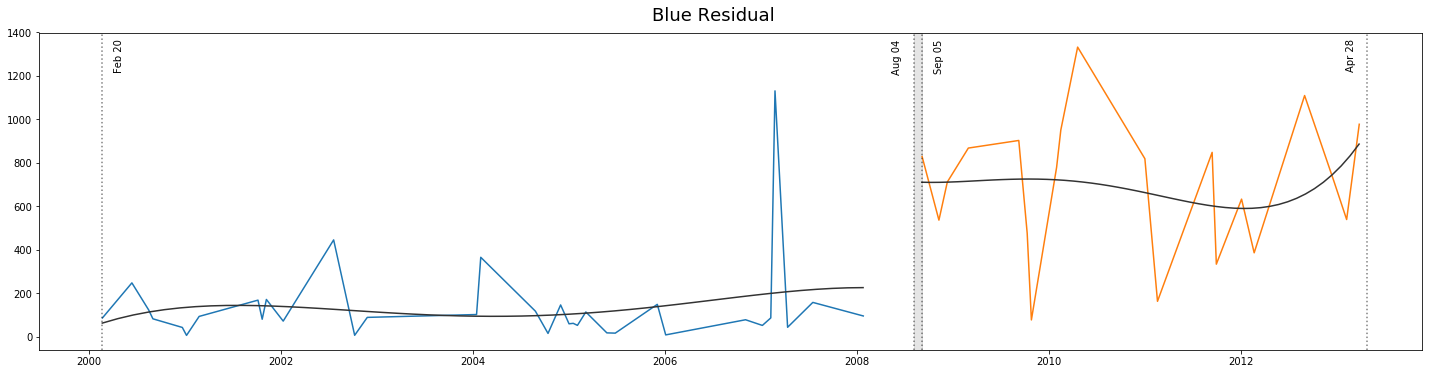

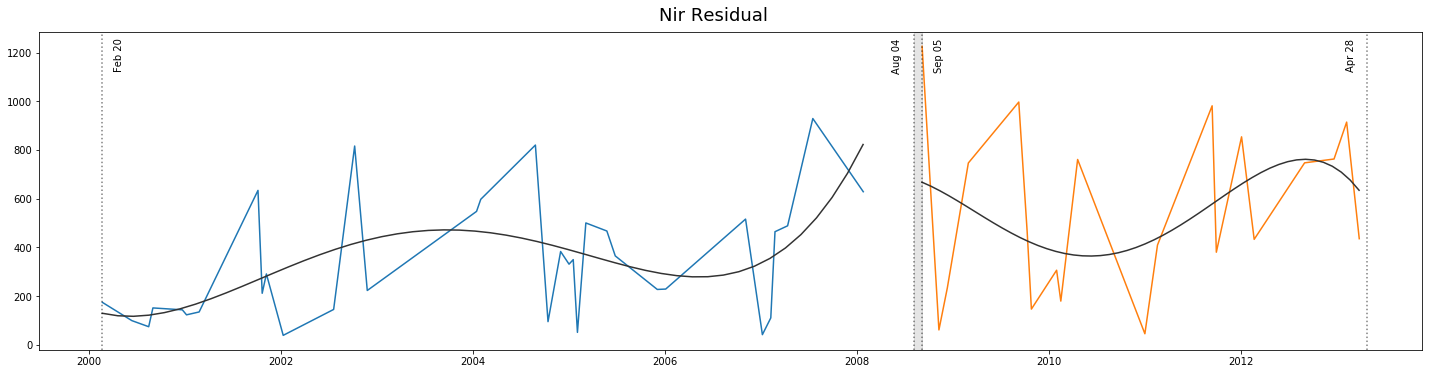

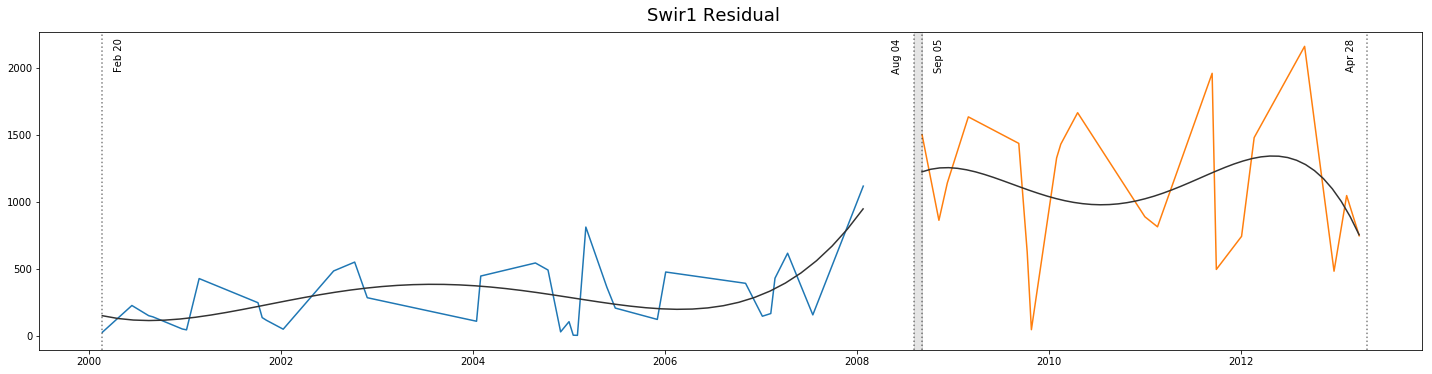

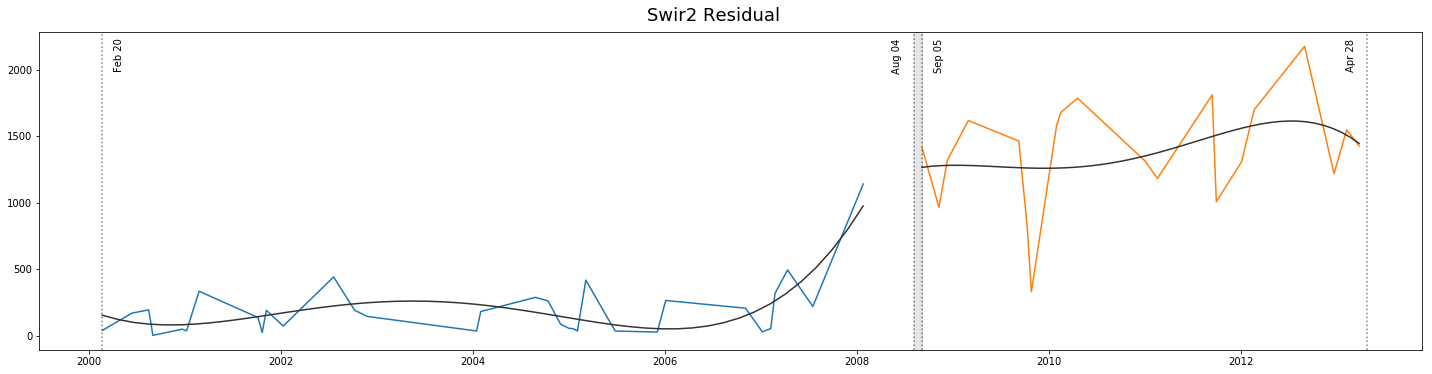

In [50]:
for band in ['red', 'green', 'blue', 'nir', 'swir1', 'swir2']:
    _plot_res(results= clear_pixel.attrs['ccd_results'],
              original_pixel=clear_pixel,
              band=band,
              file_name=None)